In [10]:
def read_lines_file(filename):
    f = open(filename, "r")
    mylist = f.readlines()
    res = []
    for line in mylist:
        l = line.strip()
        line = l.split('␟')
        res.append(line)
        #print(len((line)))
    f.close()
    return mylist, res
mylist, res = read_lines_file("firminy_centre-simplified.graph")

In [11]:
import networkx as nx
G = nx.Graph()
for line in res:
    if len(line) == 3:
        G.add_node(line[0])
    elif len(line) == 2:
        G.add_edge(line[0],line[1])

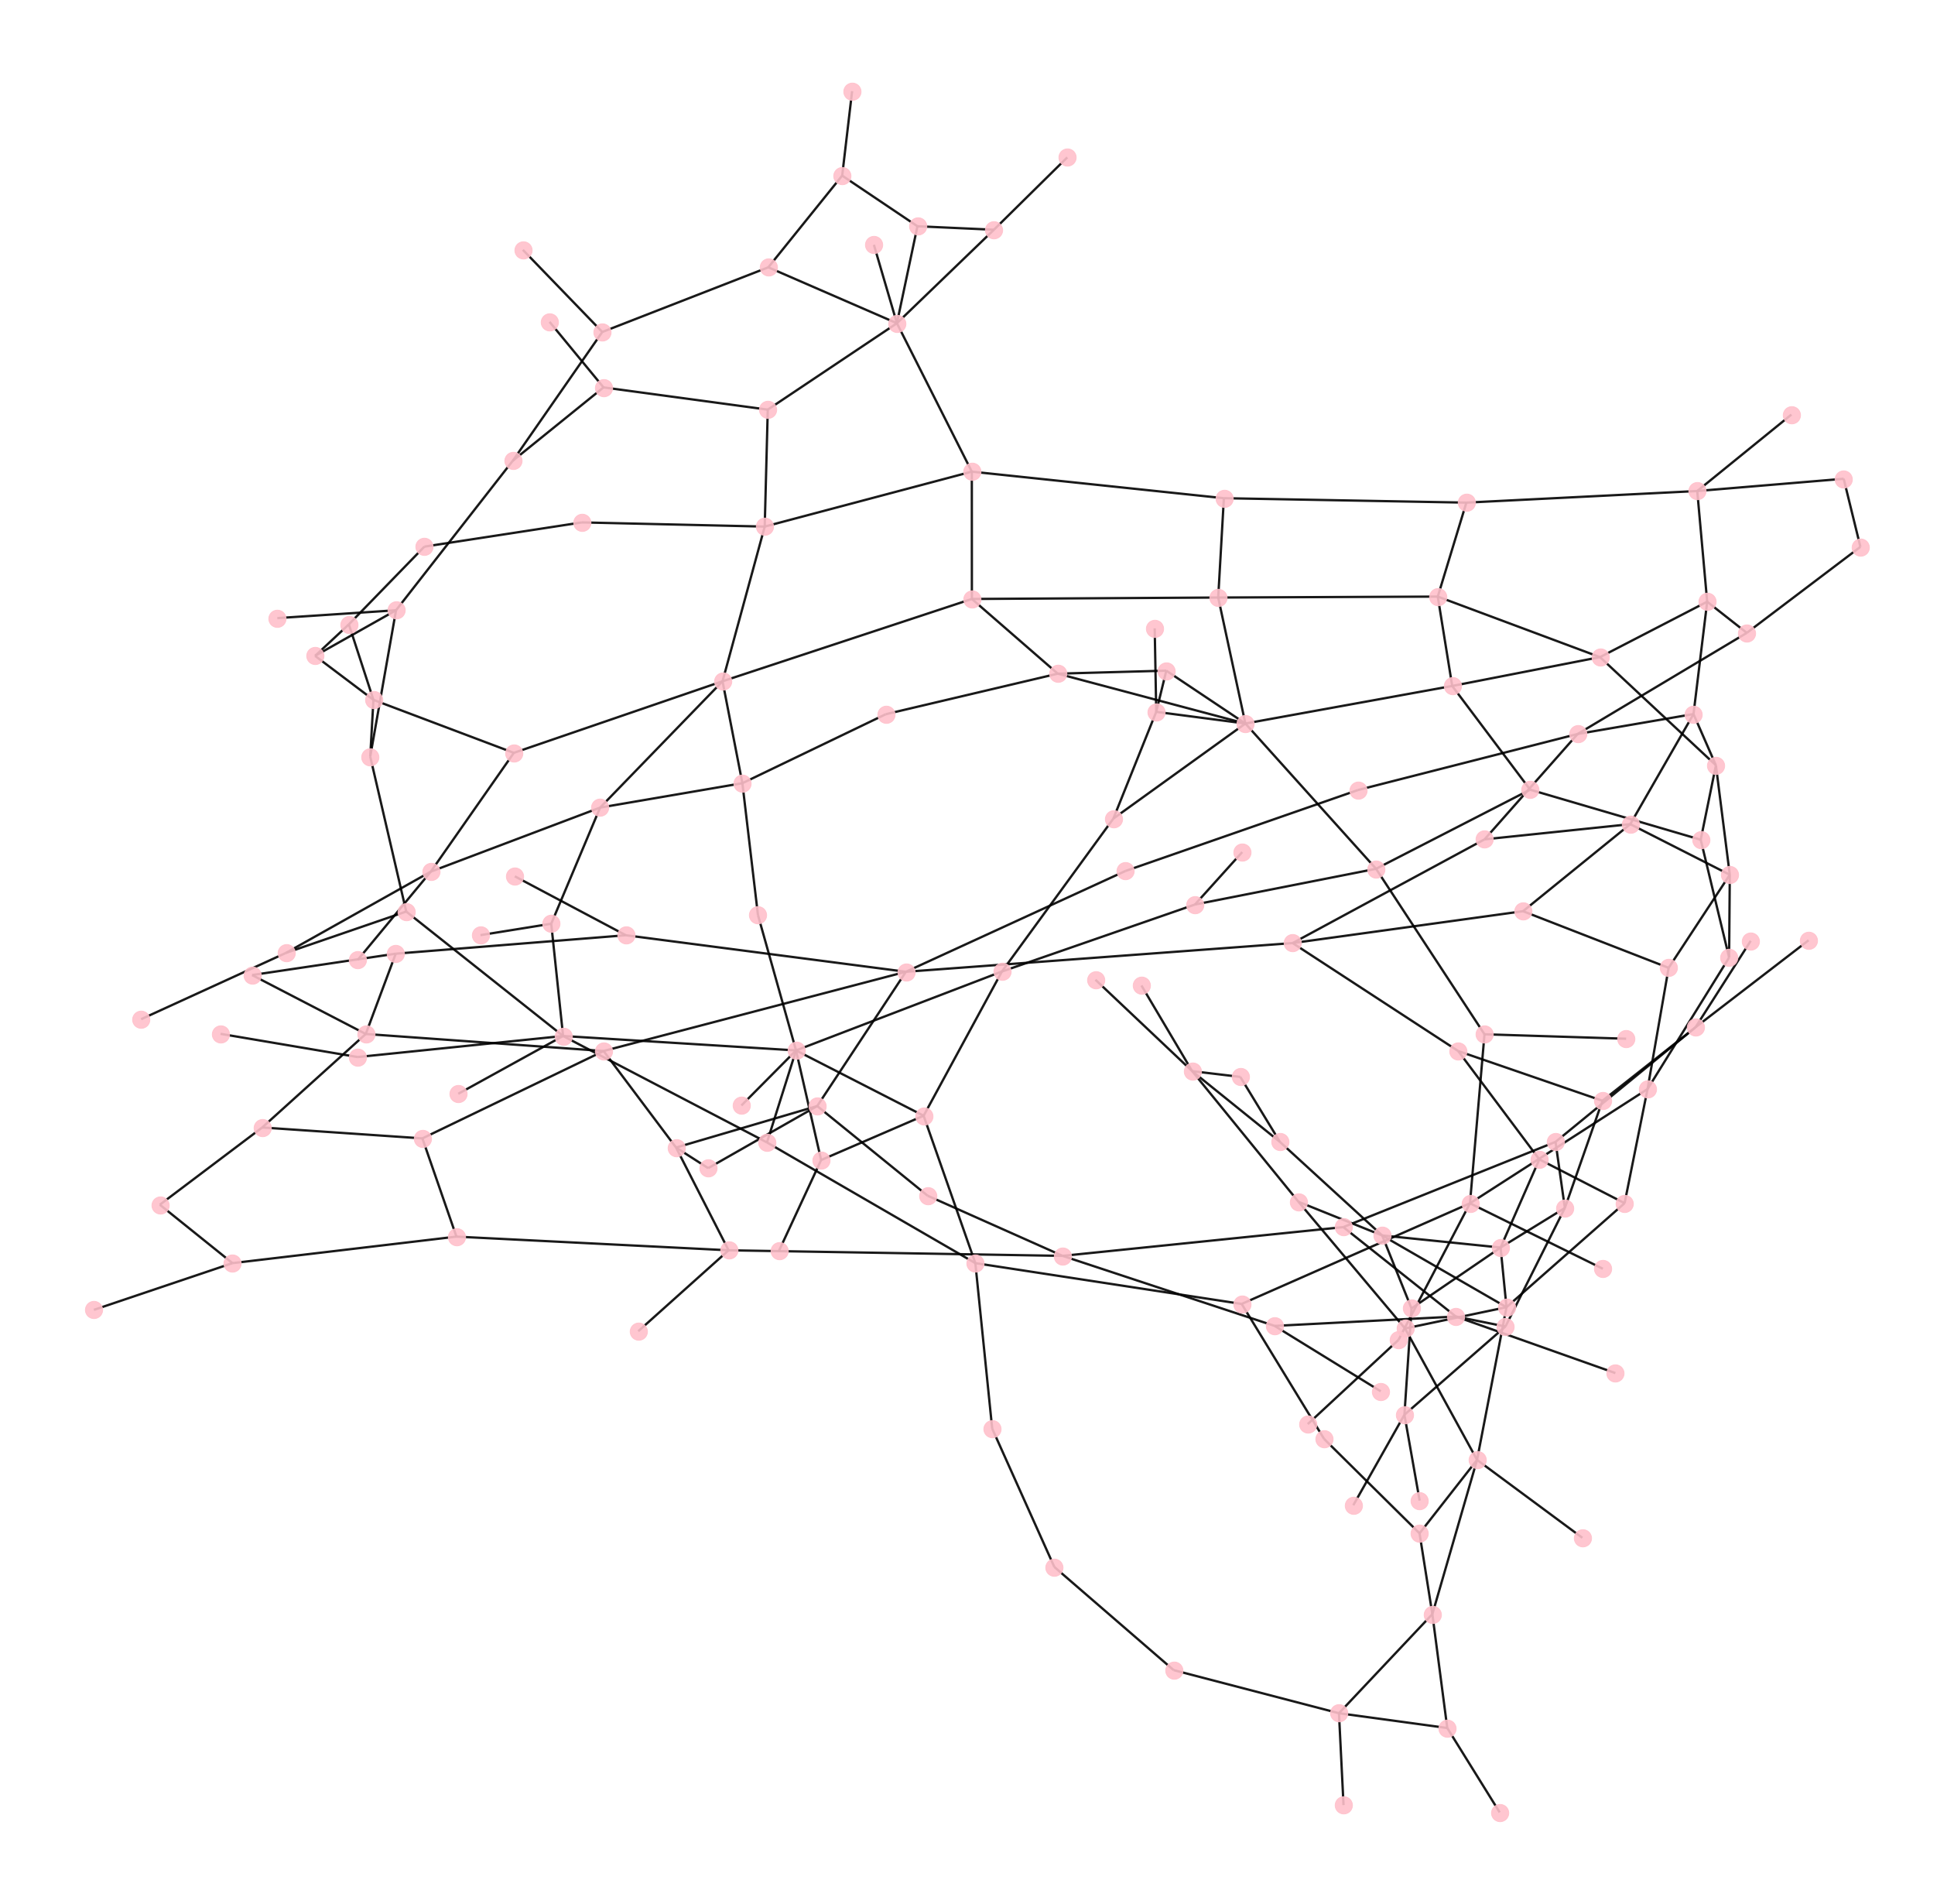

In [12]:
import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"] = (45,45)

fig, ax = plt.subplots(figsize=(45,45))
pos = nx.spring_layout(G, seed=3113794652)  # positions for all nodes
#pos = nx.circular_layout(G)
nx.draw(G, pos, edge_color='black',
node_size=500, node_color='pink', alpha=0.9, font_size = 1, with_labels = False, width = 3)
plt.savefig("firminy_neutre" )

In [13]:
from networkx.algorithms.approximation import vertex_cover, min_weighted_dominating_set
cov = vertex_cover.min_weighted_vertex_cover(G)

In [14]:
def cover_dic(cov, G):
    d = dict()
    for v in G.nodes:
        if v in cov:
            d[v] = 1
        else:
            d[v] = 0
    return d

In [15]:
cov_d = cover_dic(cov, G)

In [16]:
bet = nx.betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None)
#max_bet = max(bet.values())

In [17]:
bet_edges = nx.edge_betweenness_centrality(G, k=None, normalized=True, weight=None, seed=None)
#max_bet_edge = max(bet.values())

In [18]:
# from https://stackoverflow.com/questions/20792445/calculate-rgb-value-for-a-range-of-values-to-create-heat-map
def rgb_norm(minimum, maximum, value):
    minimum, maximum = float(minimum), float(maximum)
    ratio = 2 * (value-minimum) / (maximum - minimum)
    b = int(max(0, 255*(1 - ratio)))
    r = int(max(0, 255*(ratio - 1)))
    g = 255 - b - r
    return r/255, g/255, b/255

In [19]:
# from https://stackoverflow.com/questions/20792445/calculate-rgb-value-for-a-range-of-values-to-create-heat-map
def rgb(minimum, maximum, value):
    minimum, maximum = float(minimum), float(maximum)
    ratio = 2 * (value-minimum) / (maximum - minimum)
    b = int(max(0, 255*(1 - ratio)))
    r = int(max(0, 255*(ratio - 1)))
    g = 255 - b - r
    return r, g, b

In [20]:
import matplotlib.pyplot as plt
def draw_graph(G, node_val, edge_val):
    fig, ax = plt.subplots(figsize=(45,45))
    pos = nx.spring_layout(G, seed=3113794652)  # positions for all nodes
    options = {  "alpha": 0.9}
    
    if node_val != None:
        max_val = max(node_val.values())
        #color_map_node = { e : 1-node_val[e]/max_val for e in G.nodes }
        color_map_node = { e : rgb_norm(0, max_val, node_val[e]) for e in G.nodes }
        size_map_node = { e : 500 + 1000*node_val[e]/max_val for e in G.nodes }
        nx.draw_networkx_nodes(G, pos, nodelist=list(G.nodes), node_color=list(color_map_node.values()), node_size=list(size_map_node.values()), **options)
    else:
        size_map_node = { e : 500 for e in G.nodes }
        nx.draw_networkx_nodes(G, pos, nodelist=list(G.nodes), node_size=list(size_map_node.values()), **options)
        
    if edge_val != None:
        max_val_edge = max(edge_val.values())
        color_map_edge = { e : rgb_norm(0, max_val_edge, edge_val[e]) for e in G.edges }
        #color_map_edge = { e : 1-edge_val[e]/max_val_edge for e in G.edges }
        size_map_edge = { e : 1 + 5*edge_val[e]/max_val_edge for e in G.edges }
        nx.draw_networkx_edges(G, pos, edgelist=list(G.edges), width=list(size_map_edge.values()), **options)
    else:
        size_map_edge = { e : 1  for e in G.edges }
        nx.draw_networkx_edges(G, pos, edgelist=list(G.edges), width=list(size_map_edge.values()), **options)
        

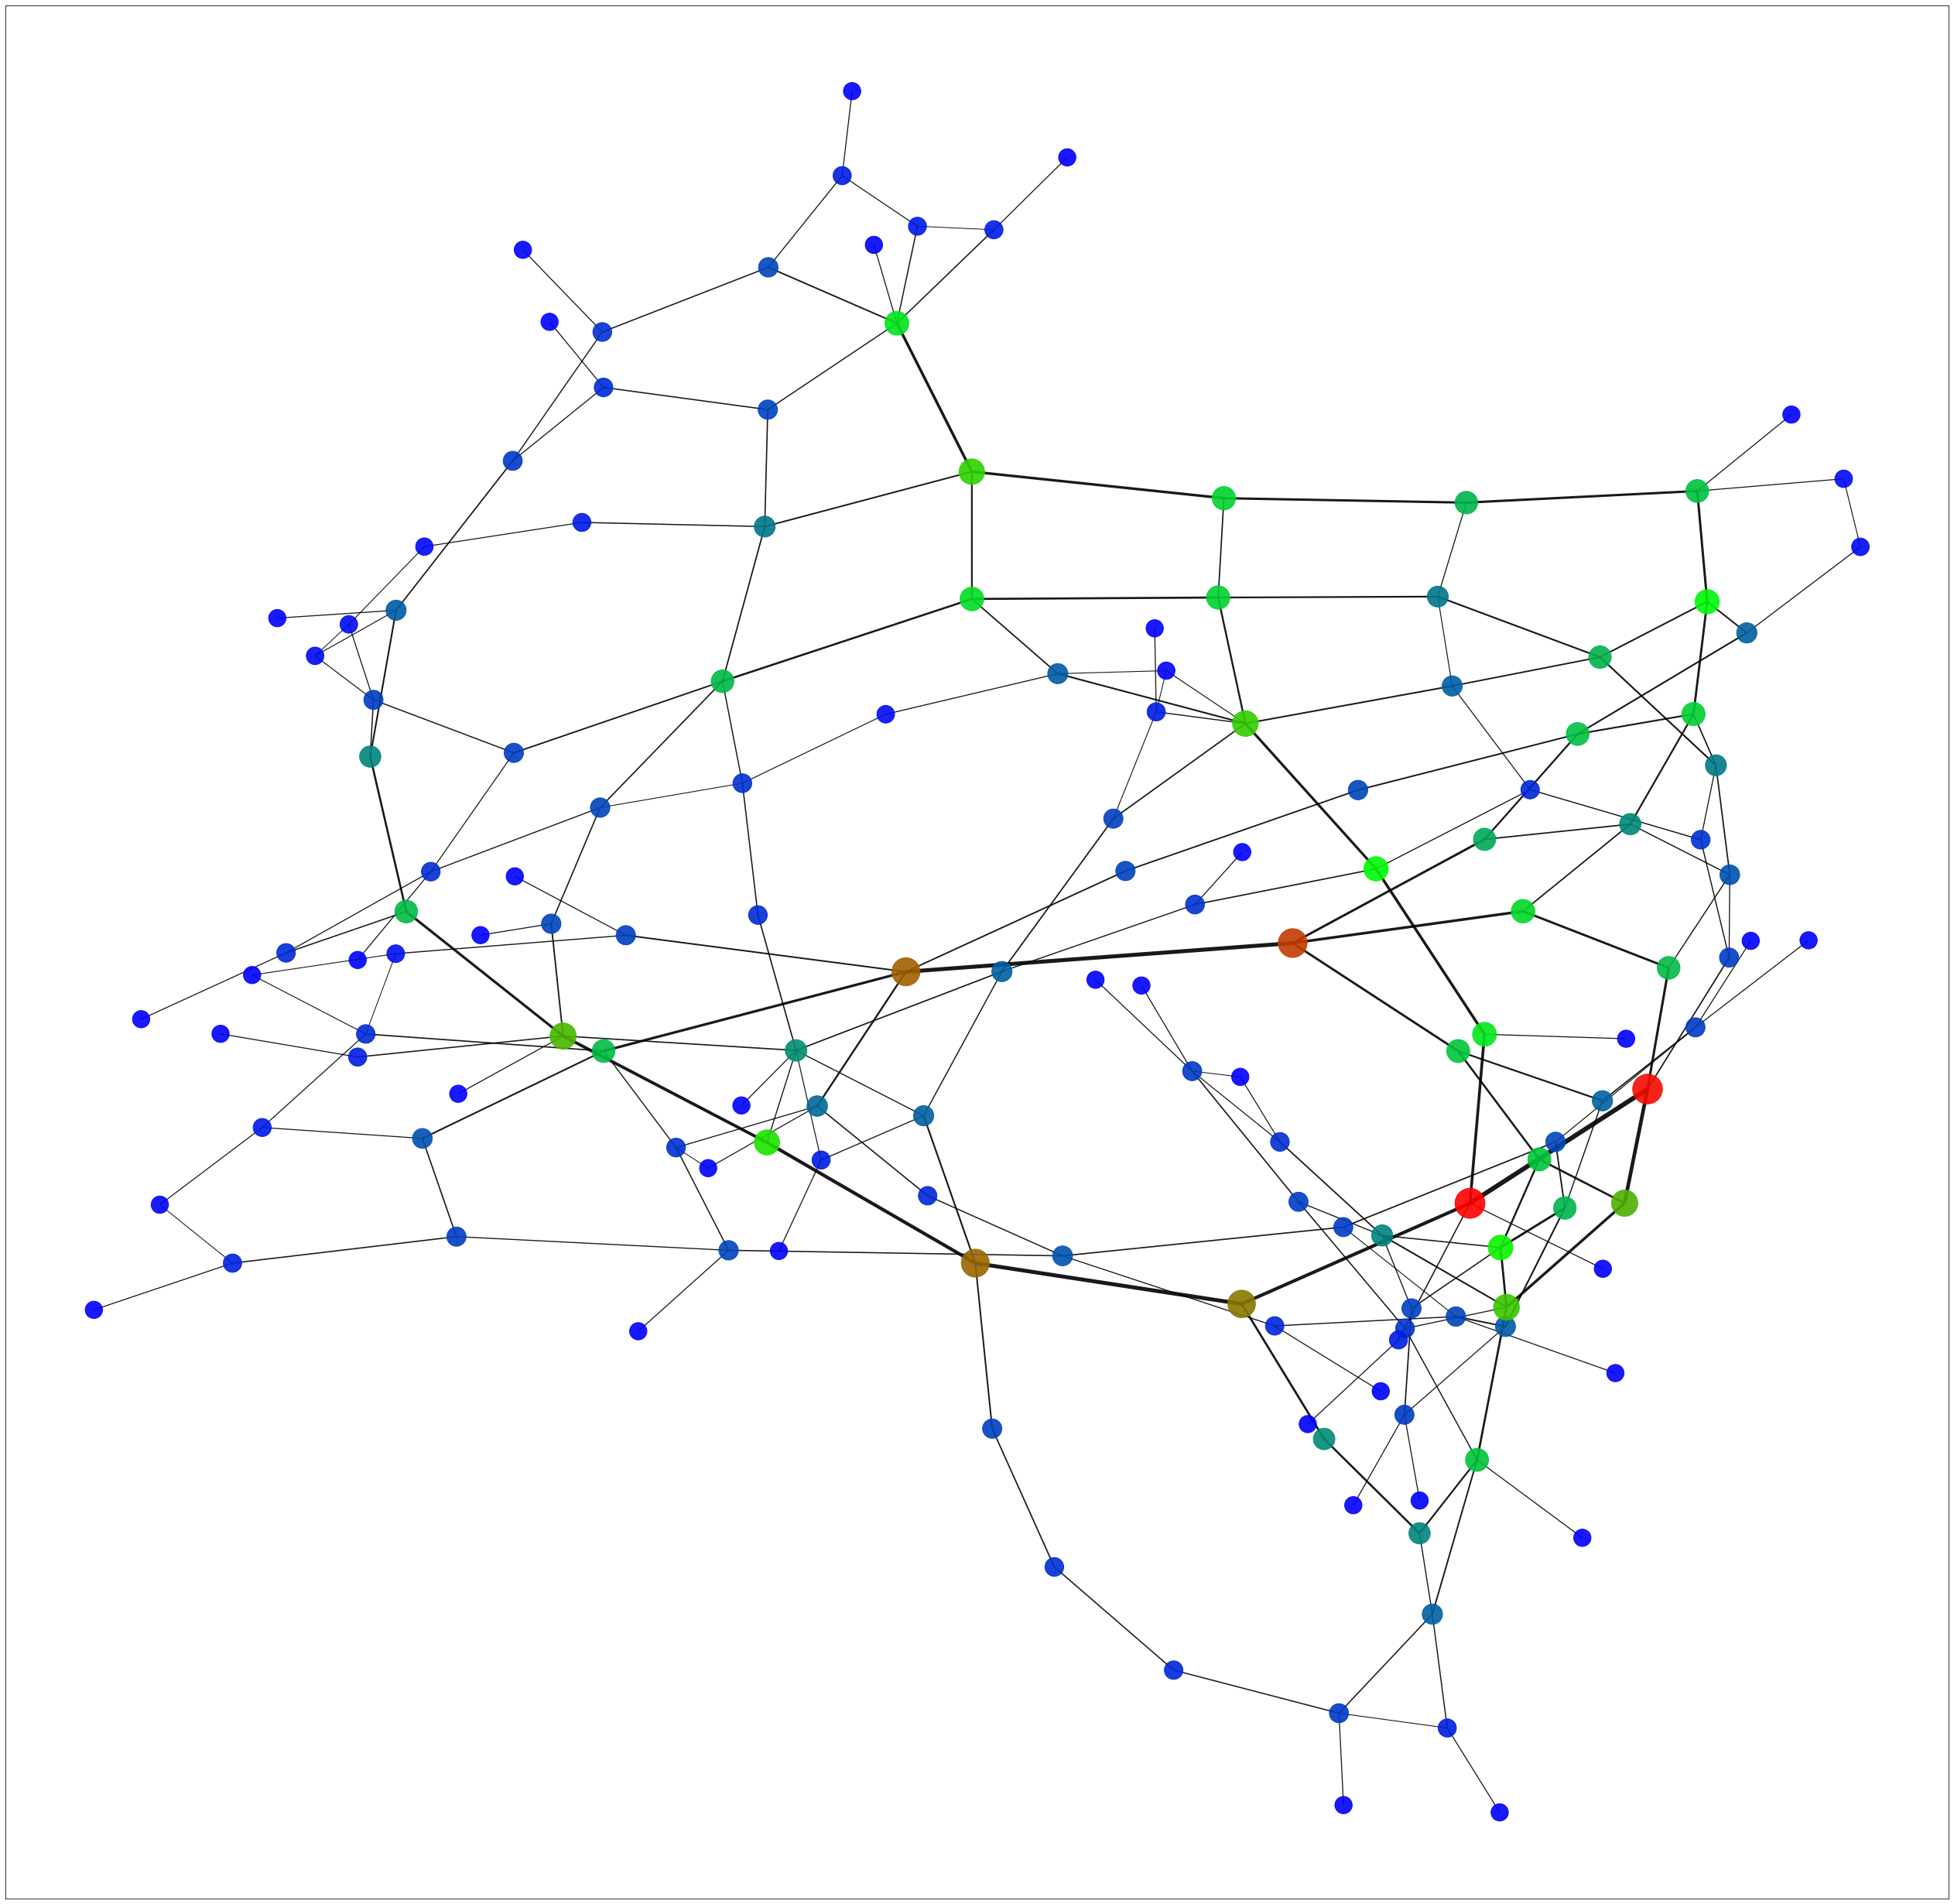

In [21]:
draw_graph(G, bet, bet_edges)

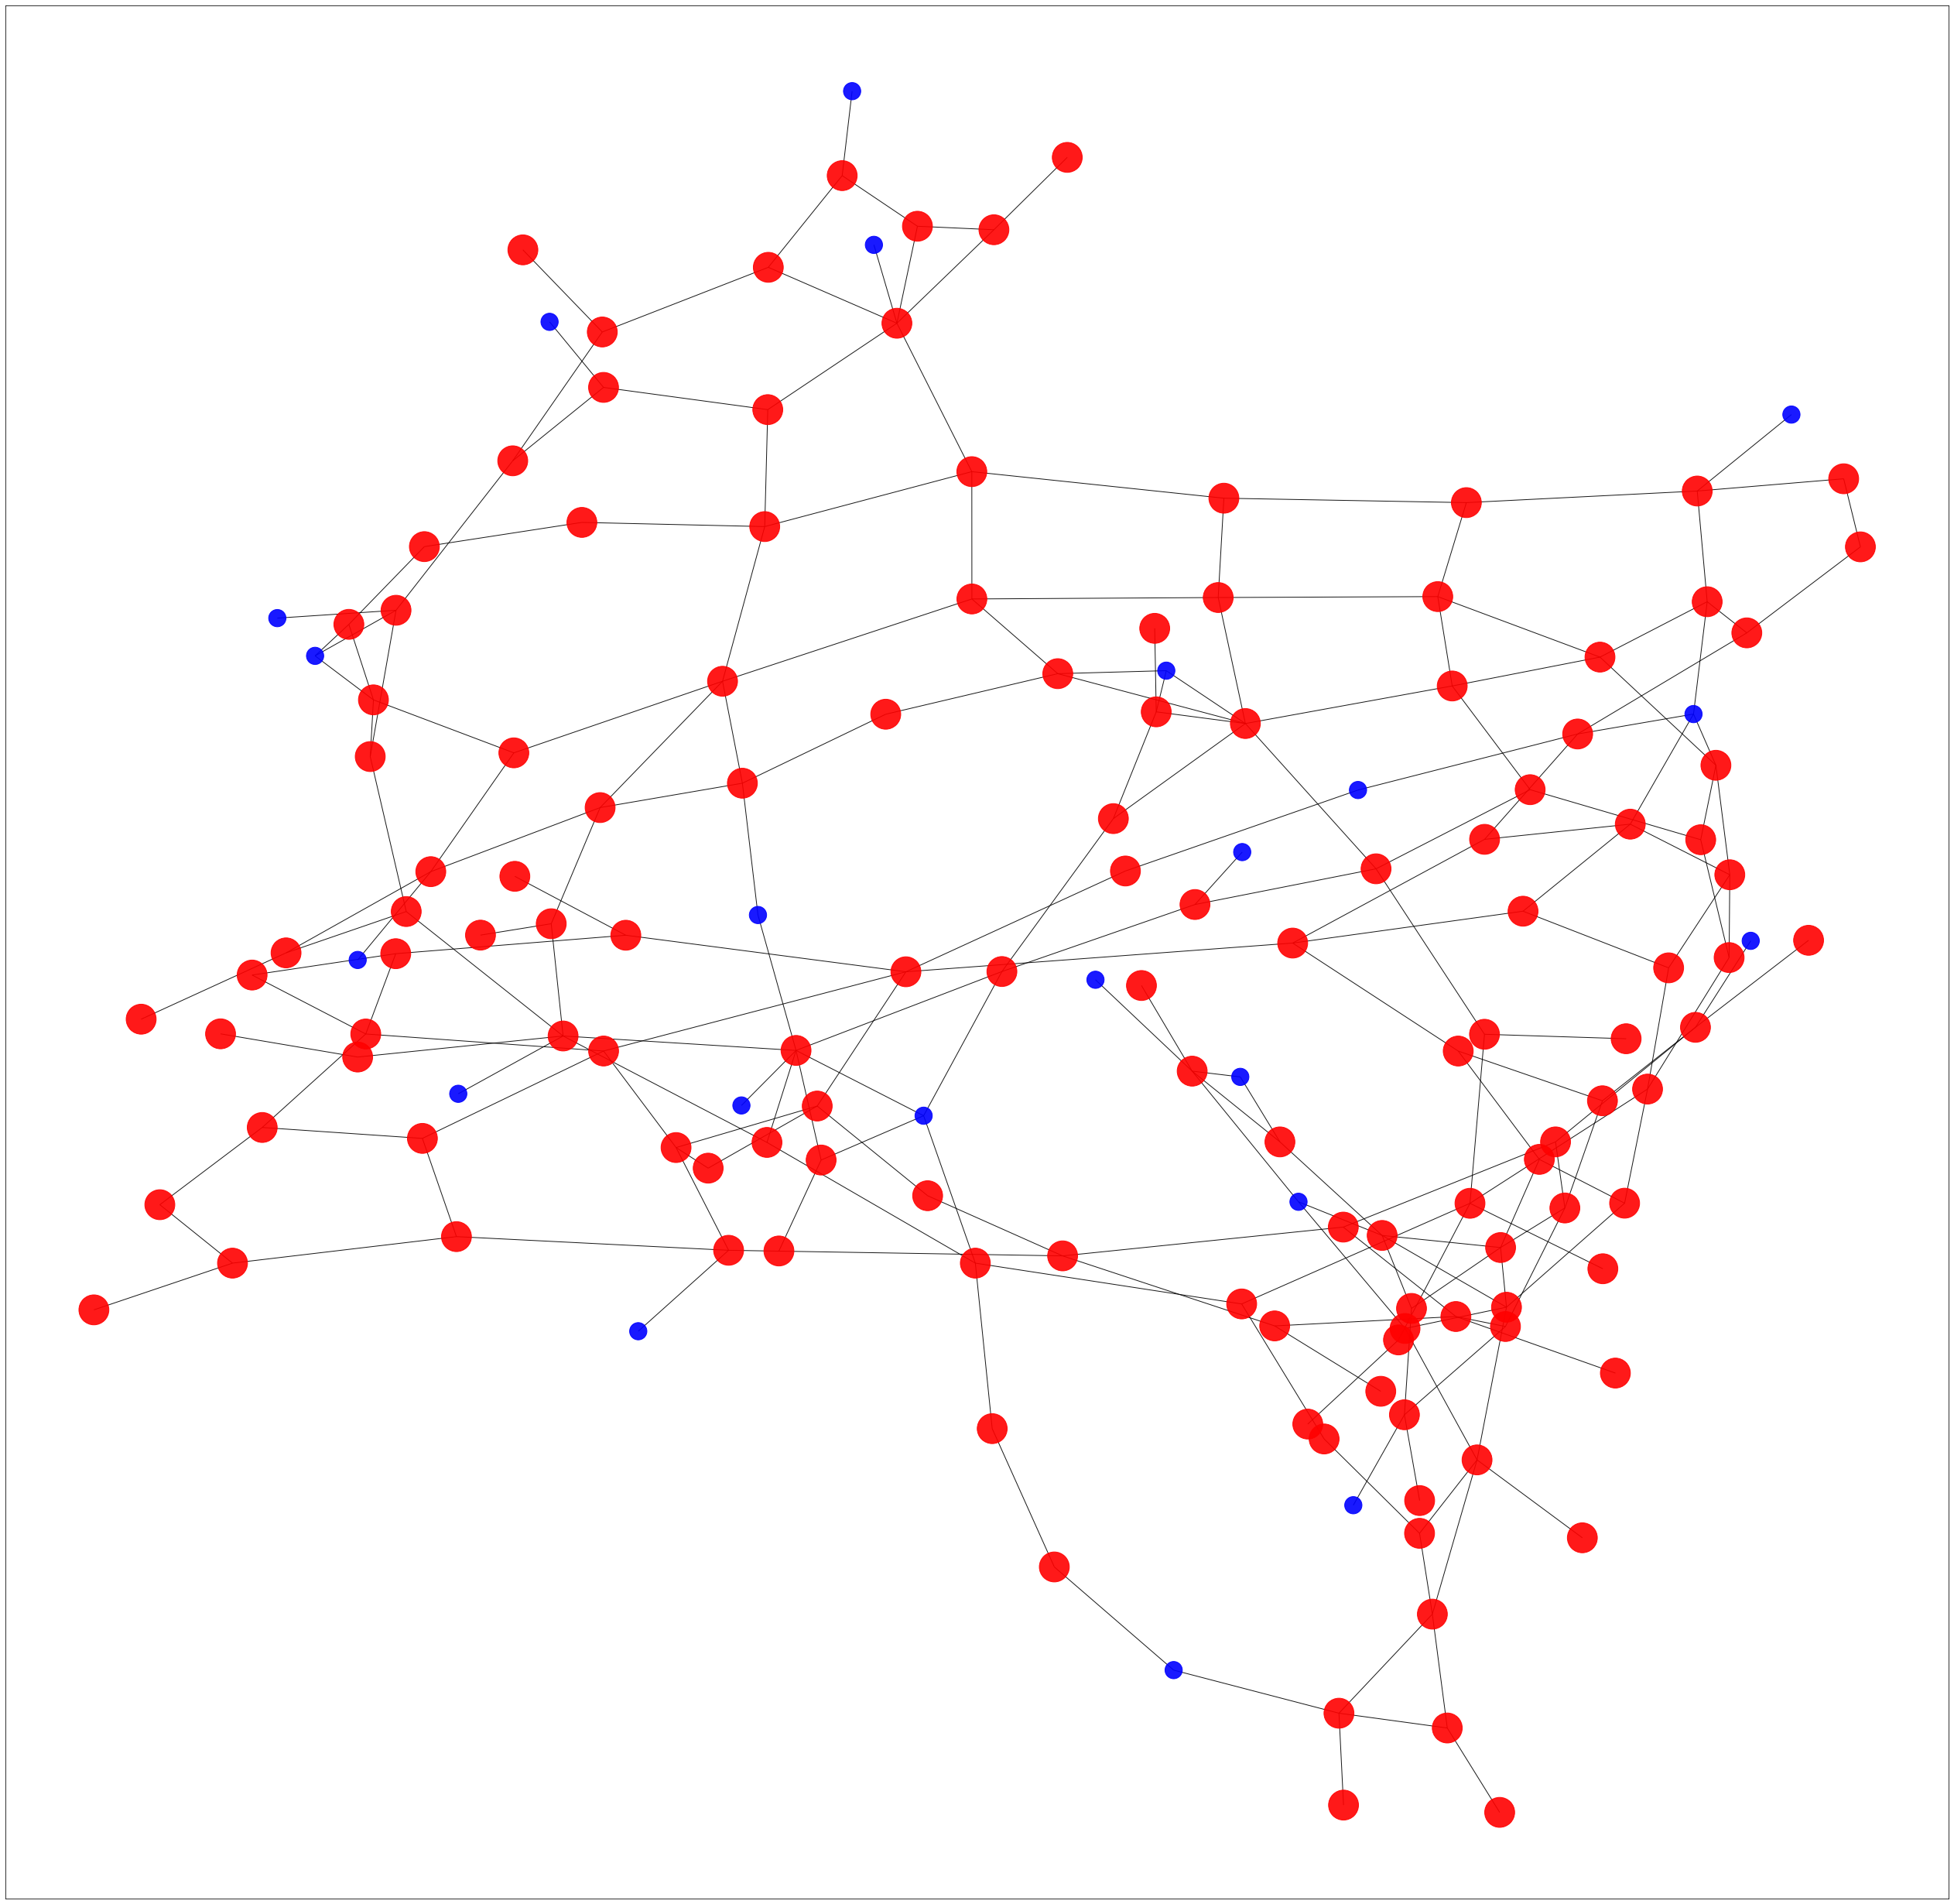

In [22]:
draw_graph(G, cov_d, None)
plt.savefig("firminy_vertex_cover" )

In [23]:
dom = nx.dominating_set(G)
dom_d = cover_dic(dom, G)

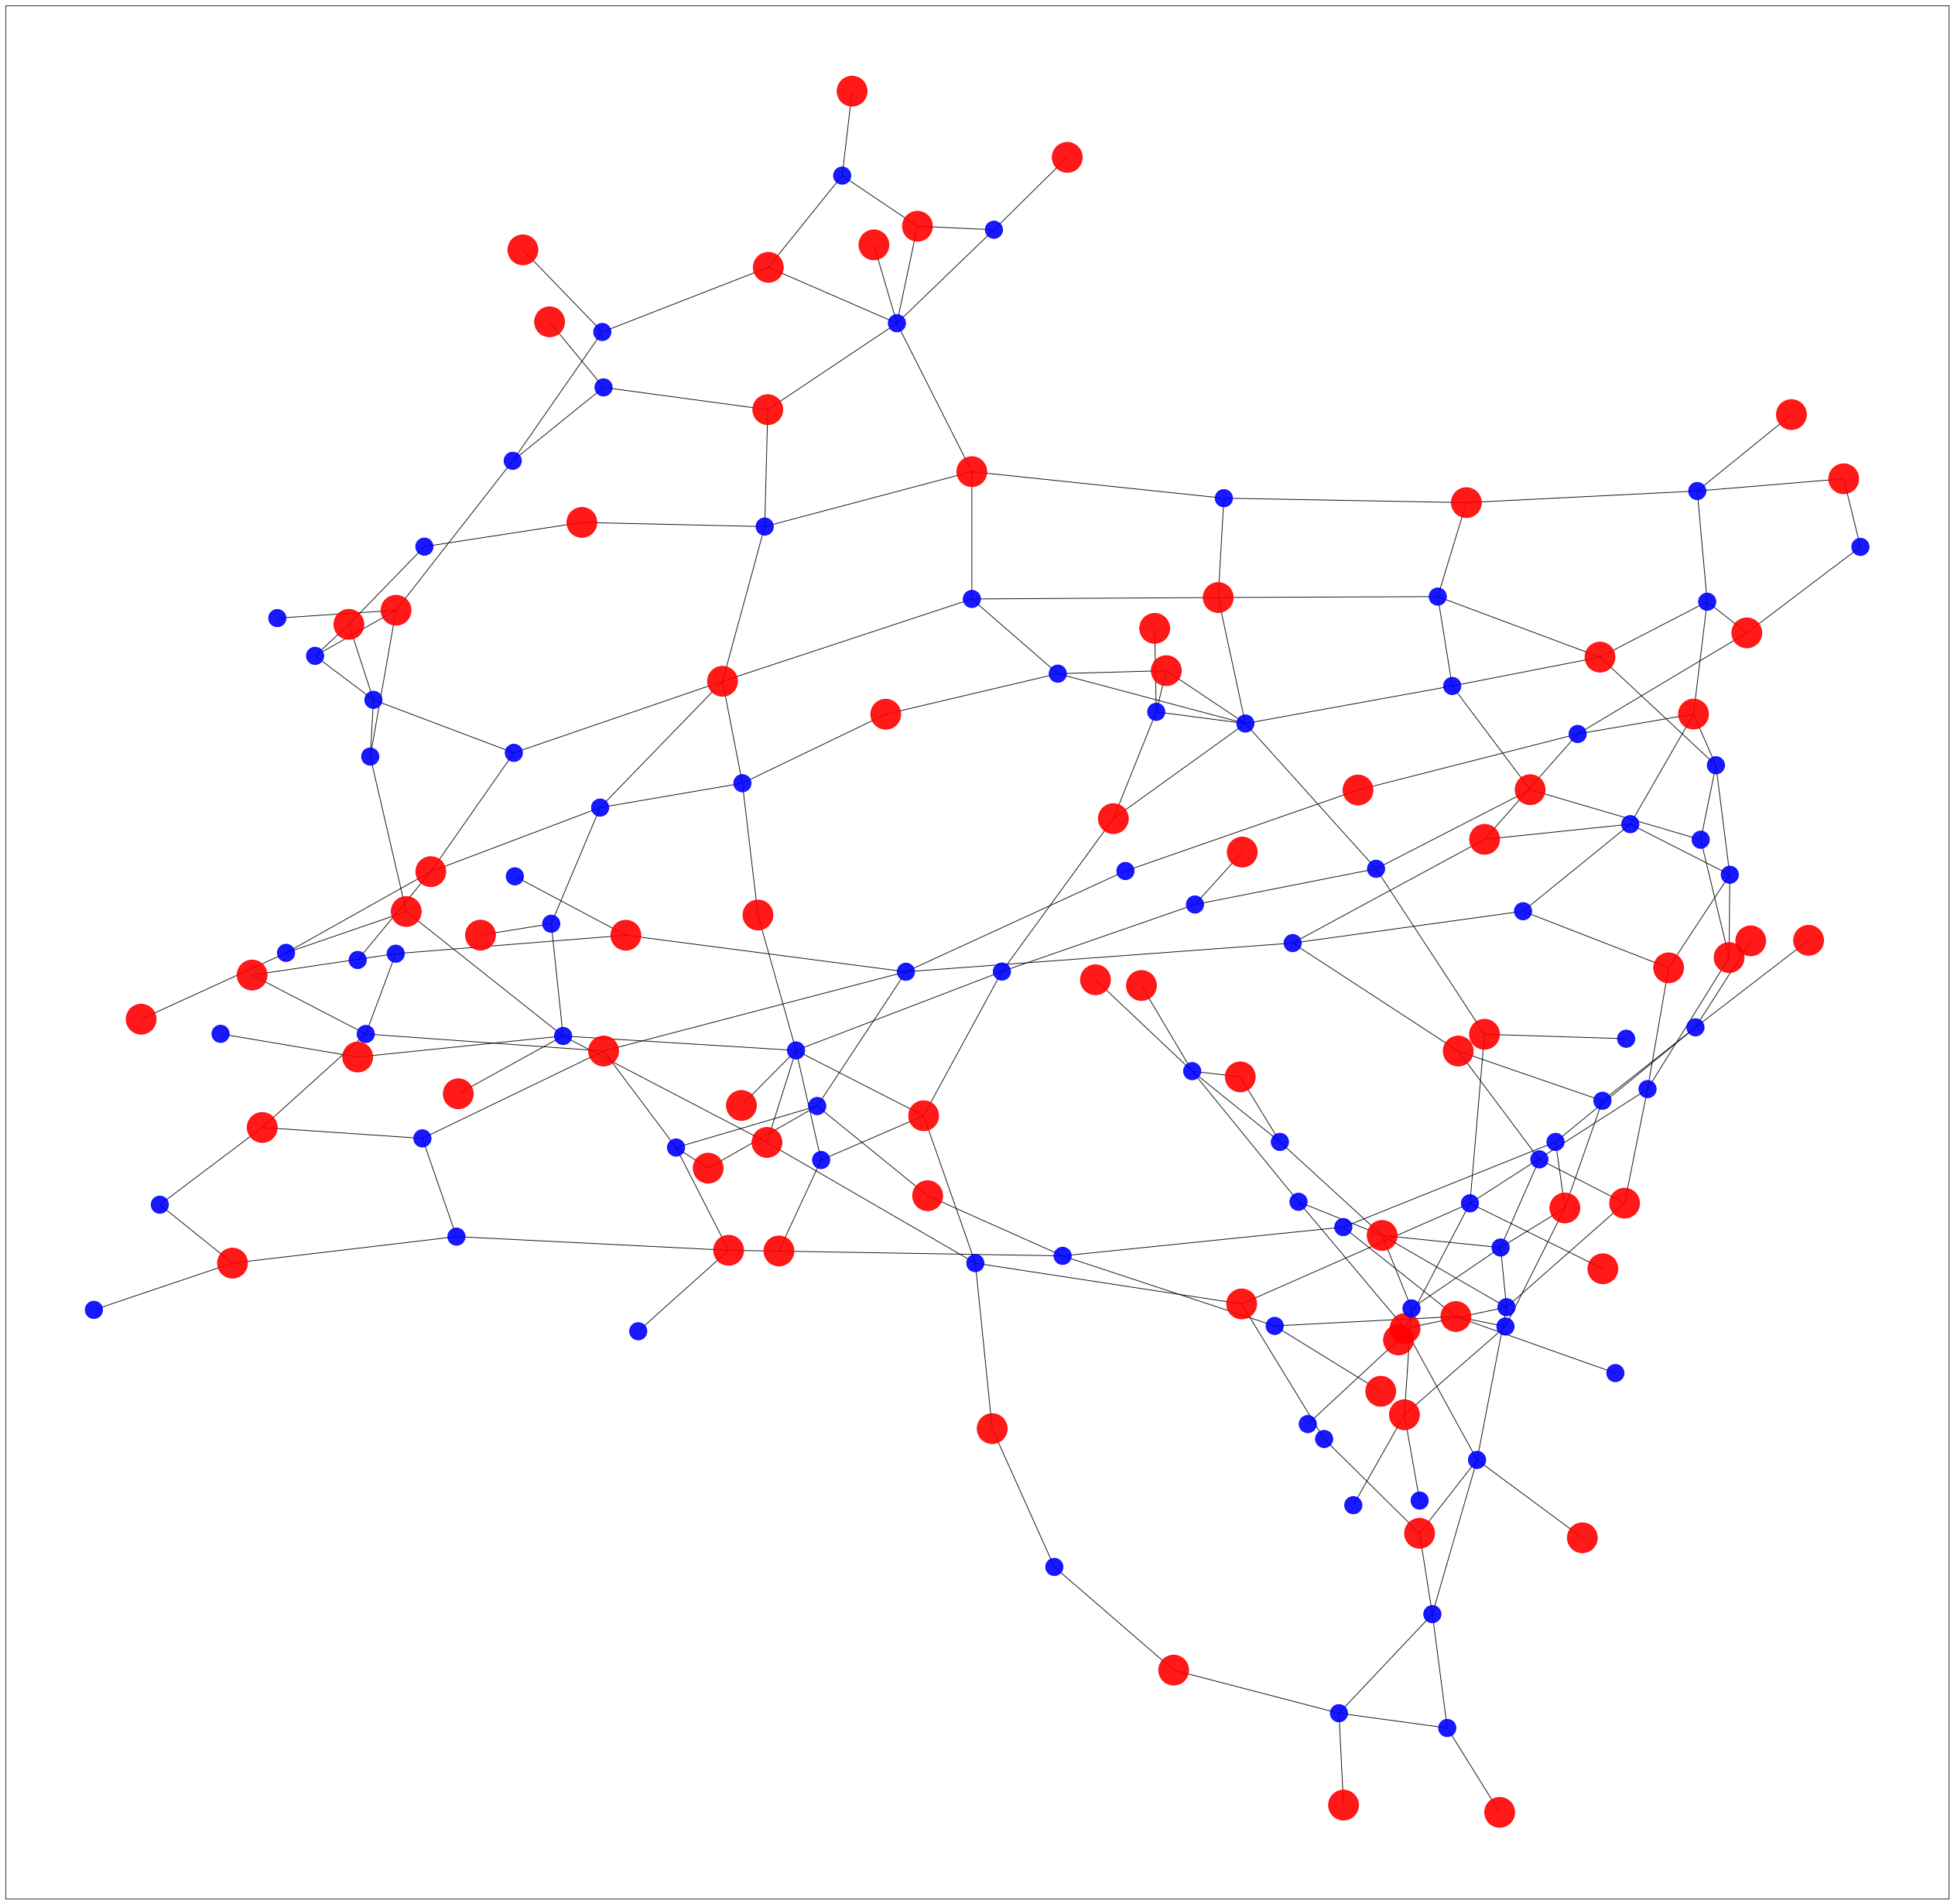

In [24]:
draw_graph(G, dom_d, None)
plt.savefig("firminy_dominating_set" )

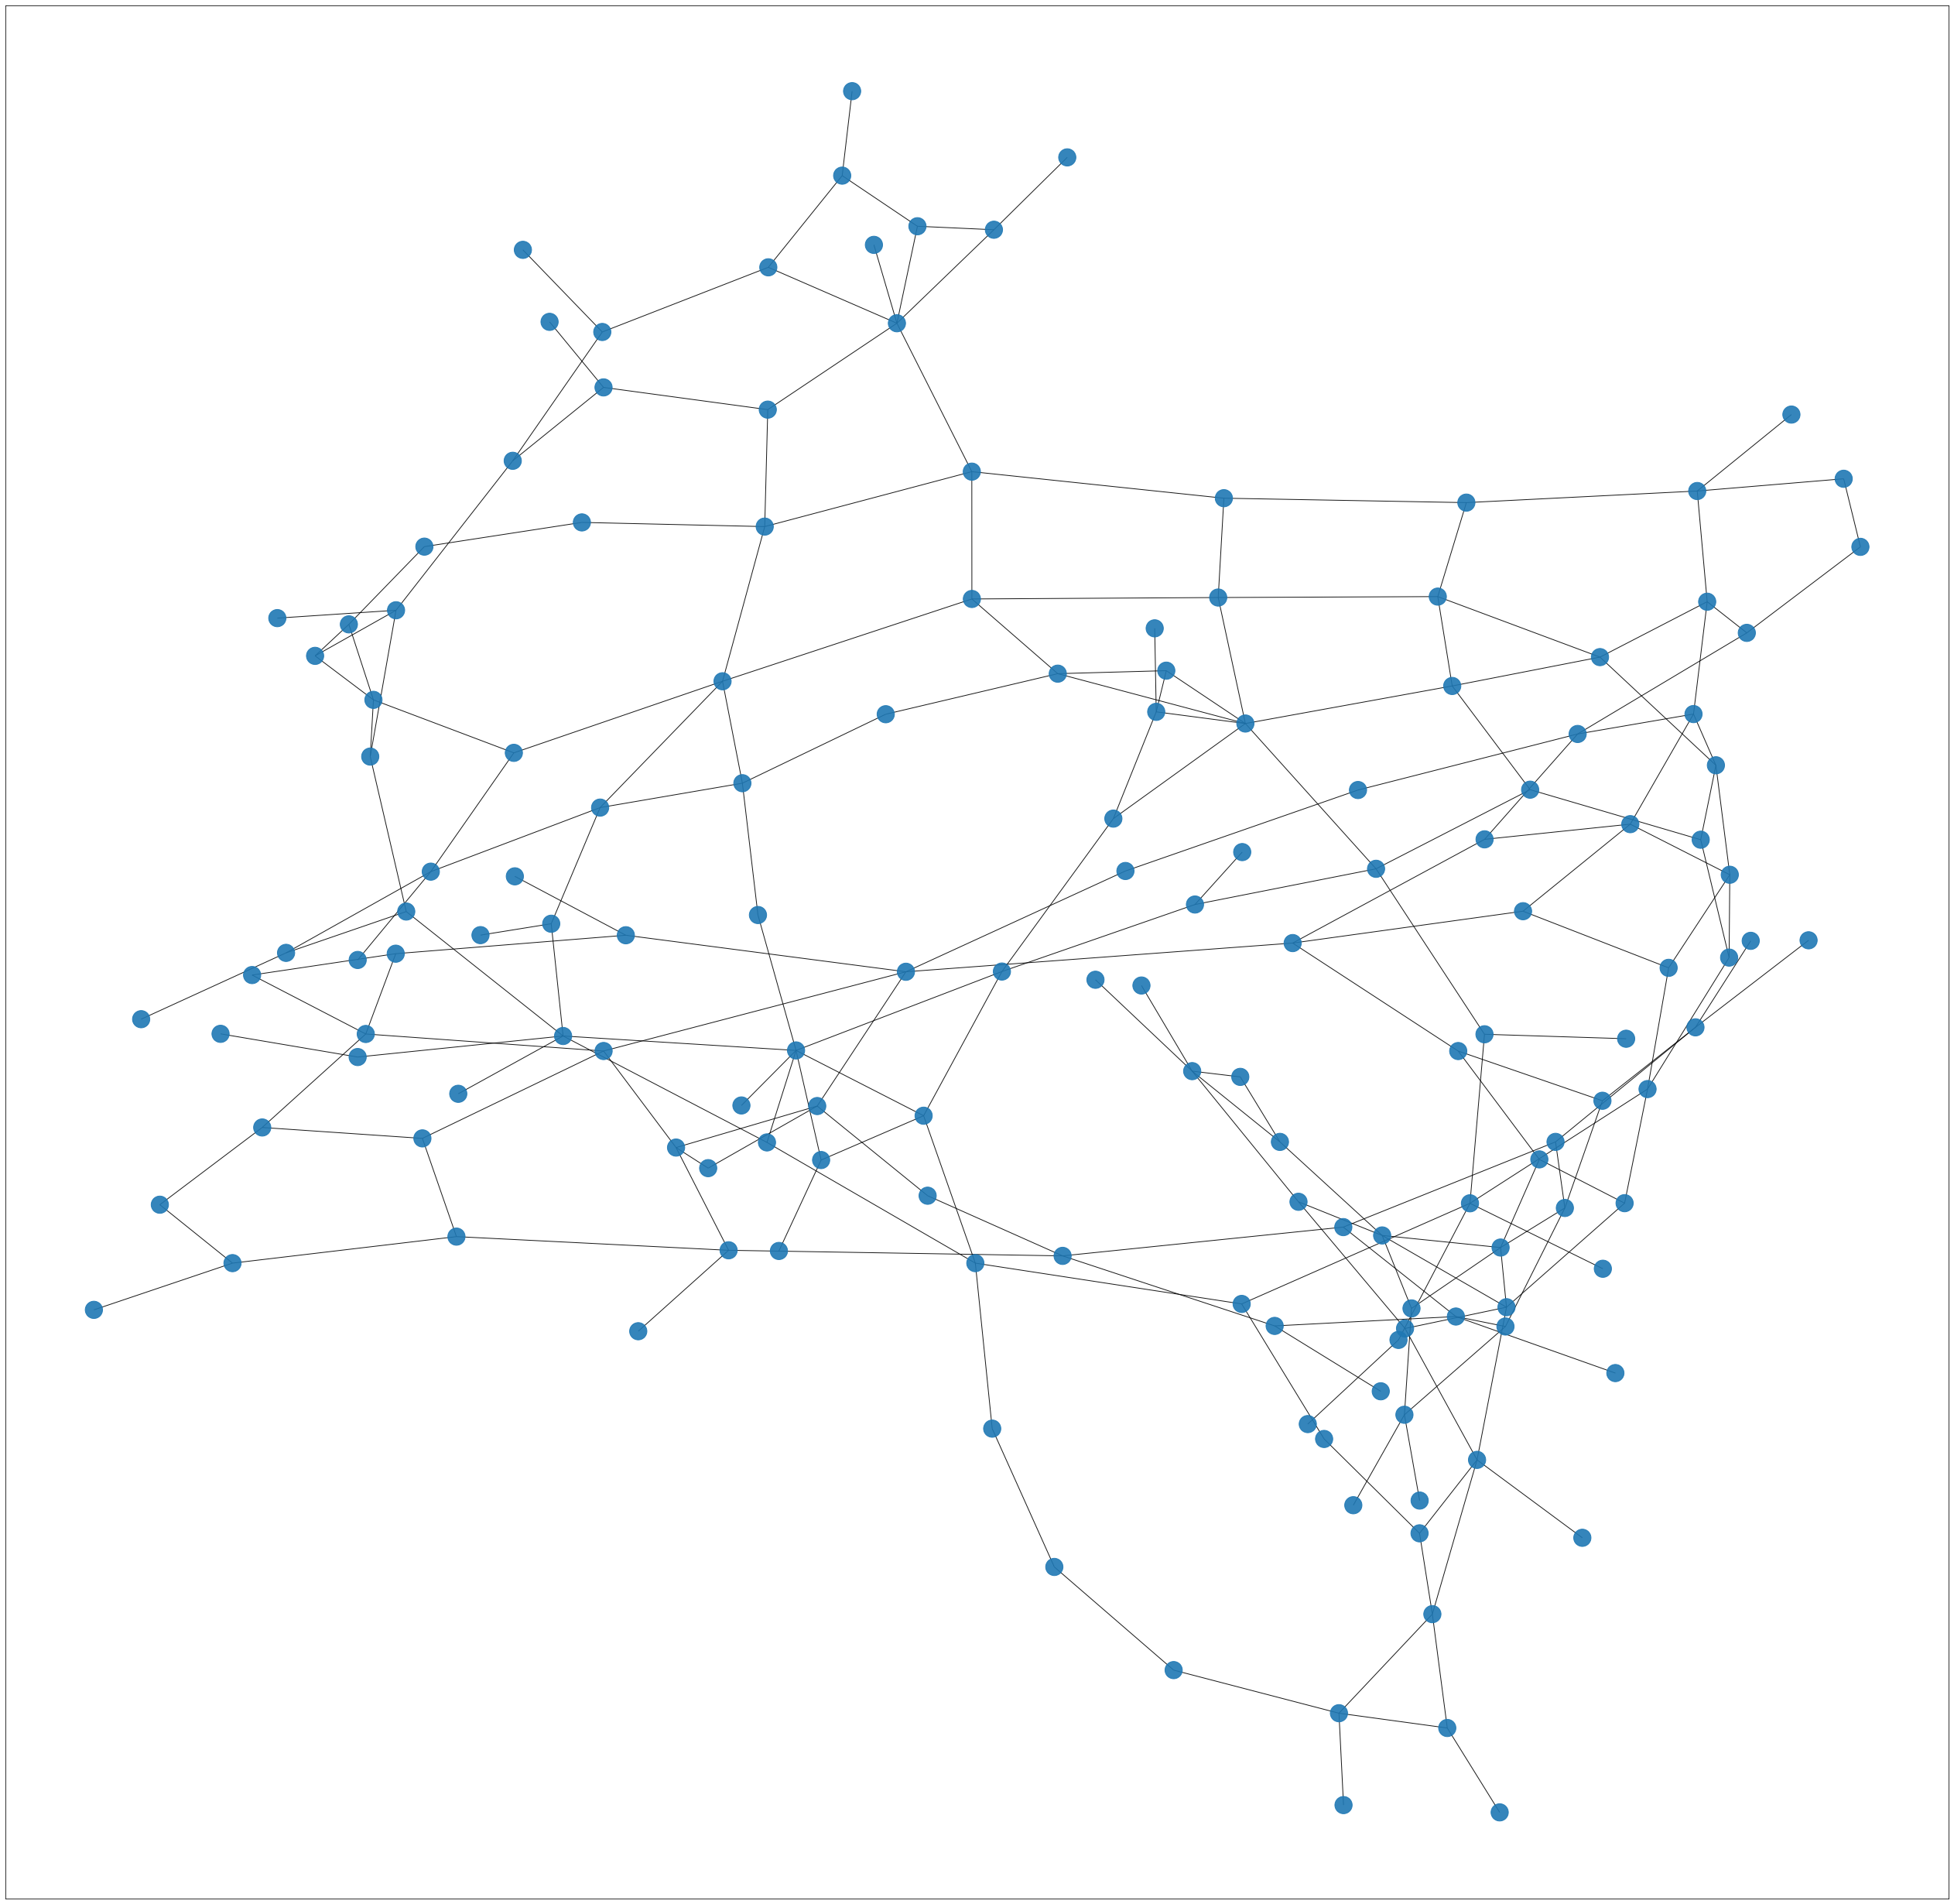

In [25]:
draw_graph(G, None, None)
plt.savefig("firminy_none" )

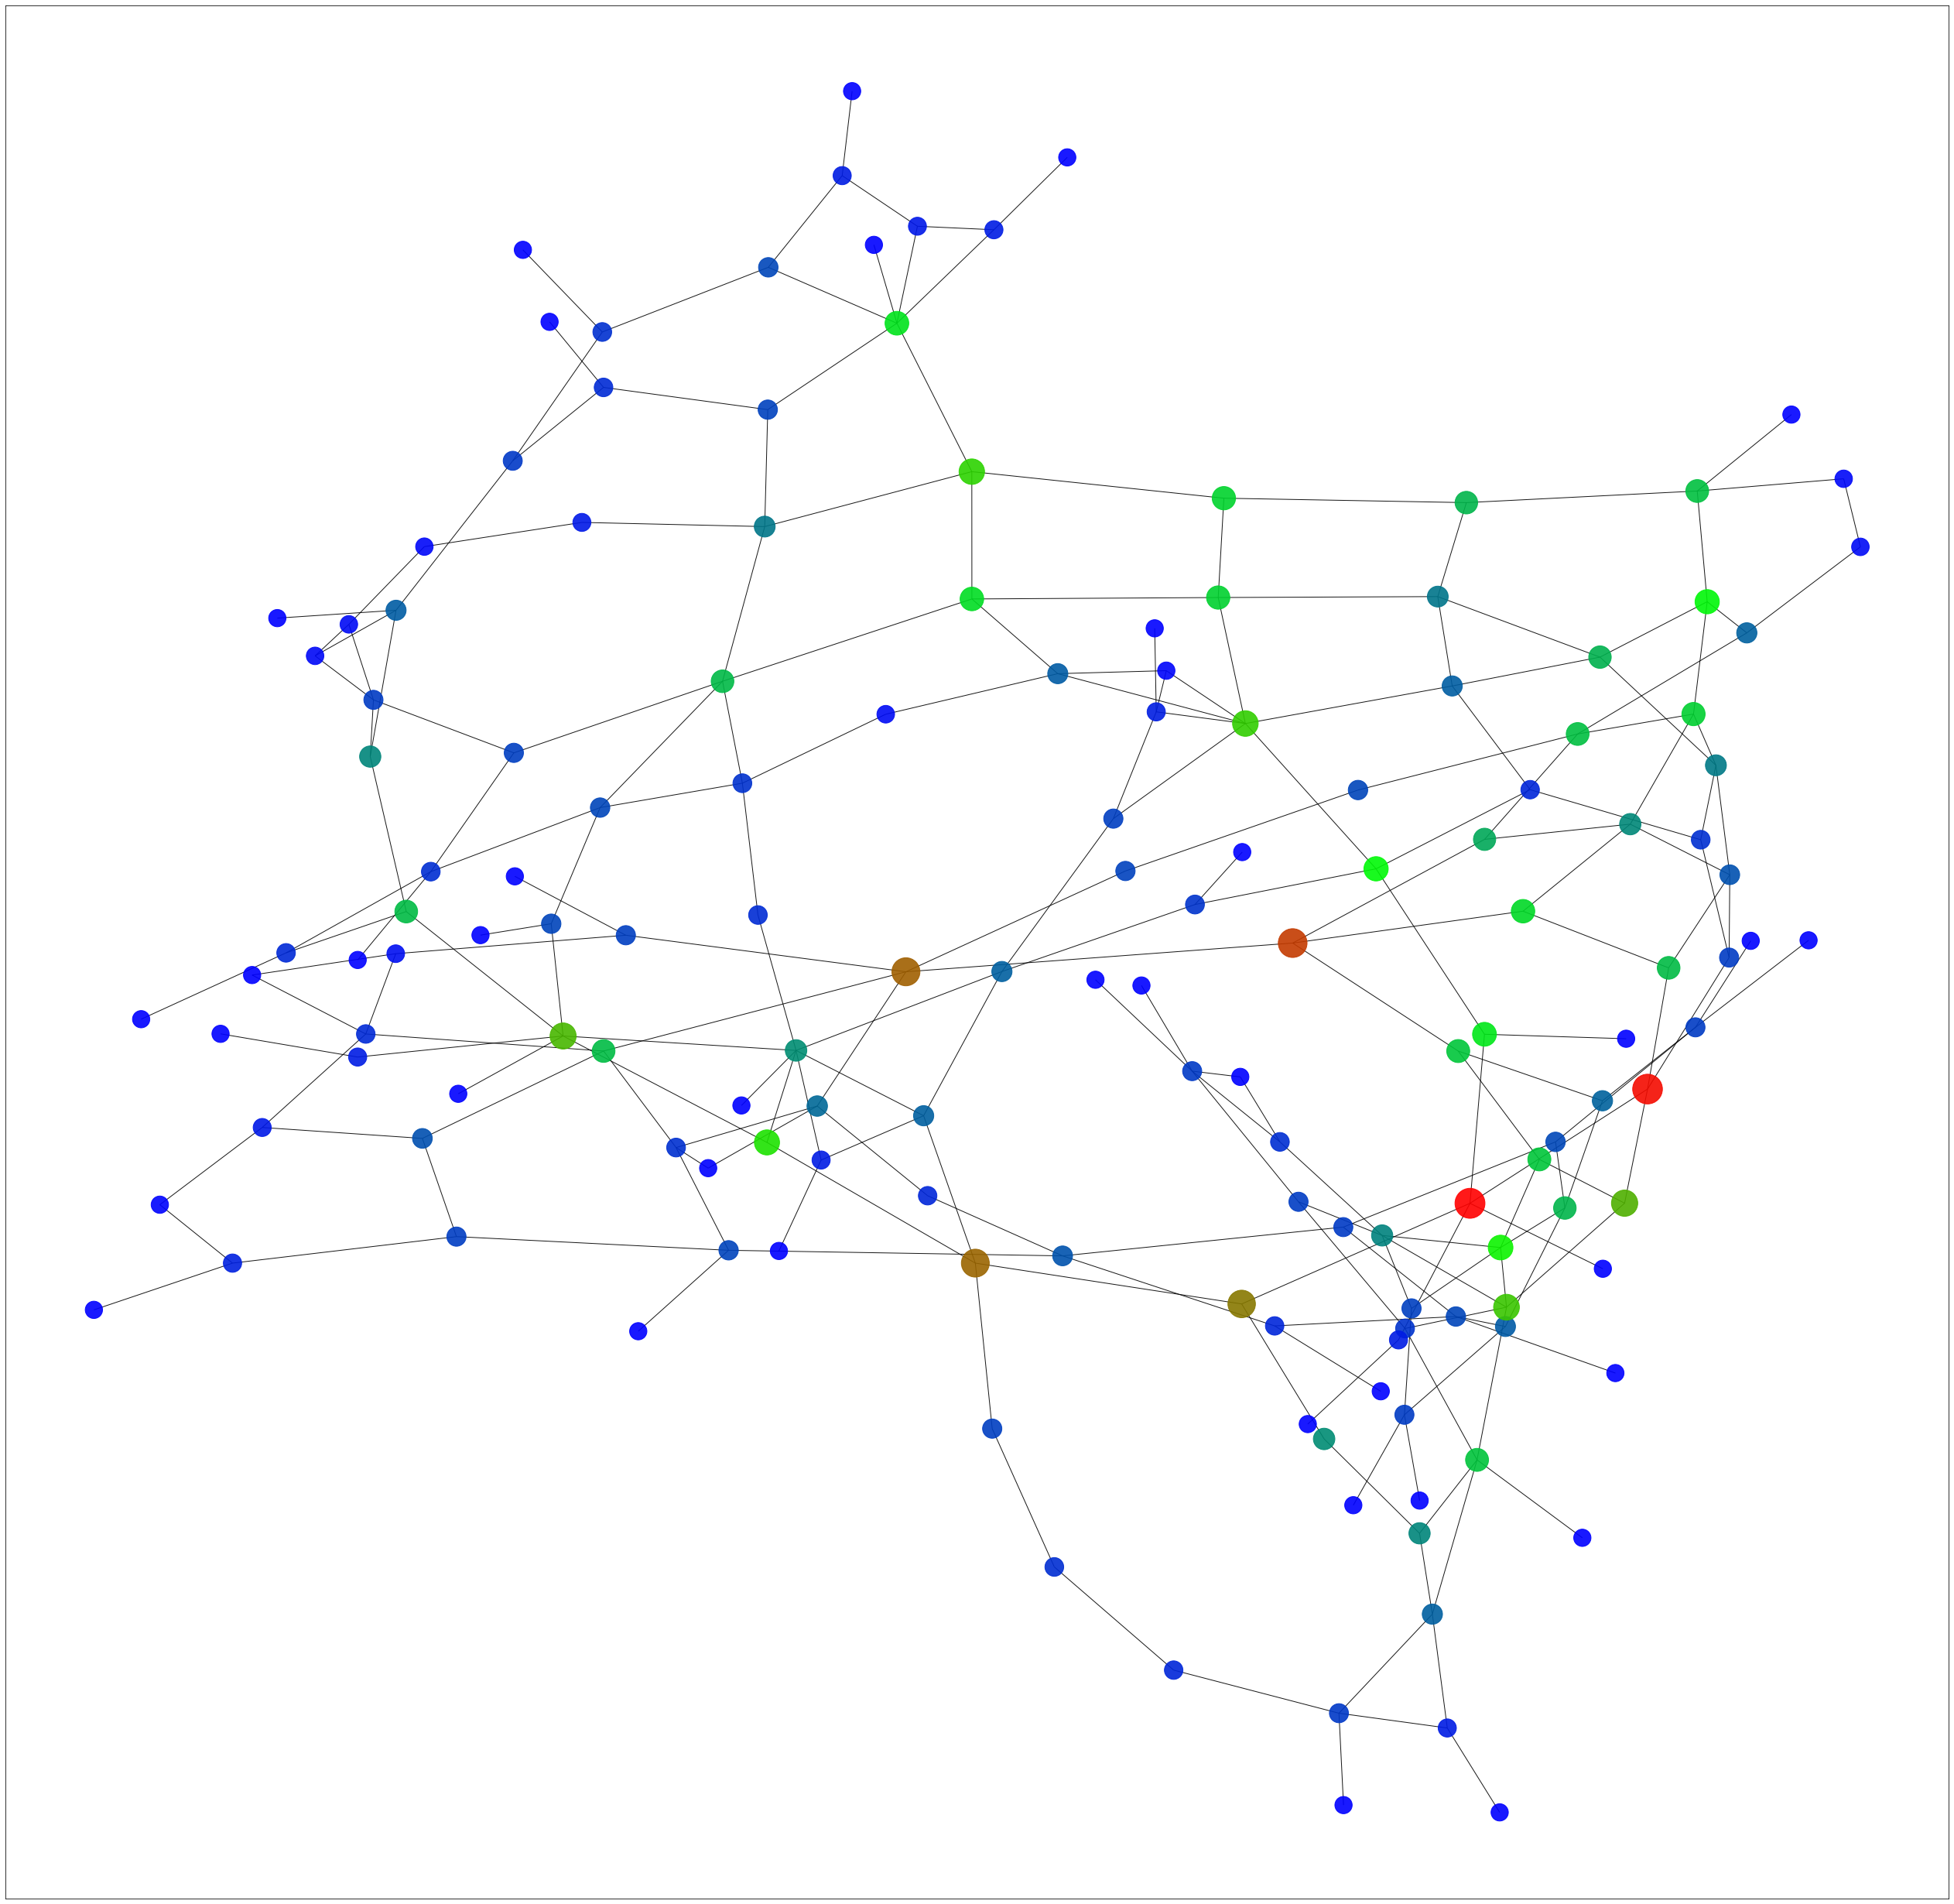

In [32]:
draw_graph(G, bet, None)
plt.savefig("firminy_bet" )

In [26]:
mylist

['6185171142␟45.3887093␟4.2911629\n',
 '1103325403␟45.3883766␟4.2946619\n',
 '1106824076␟45.3881593␟4.2831931\n',
 '4234388764␟45.3894653␟4.2972140\n',
 '2402854869␟45.3844620␟4.2877330\n',
 '2402854848␟45.3841794␟4.2859241\n',
 '1102351765␟45.3889347␟4.2885160\n',
 '2734596860-361474647␟45.3914279␟4.29057175\n',
 '1102351745␟45.3909488␟4.2892673\n',
 '1106824273␟45.3885098␟4.2852825\n',
 '1106824212␟45.3888414␟4.2849795\n',
 '2402912952␟45.3907798␟4.2827393\n',
 '247375626-2587867614-4514377420␟45.390946850000006␟4.286673825\n',
 '247375630␟45.3915986␟4.2900551\n',
 '1018420646-1018441415-7924074812␟45.3888549␟4.291995050000001\n',
 '1103326178␟45.3885582␟4.2933033\n',
 '1103076941-1107916314␟45.3874301␟4.28597965\n',
 '1102351809-247375629␟45.390459050000004␟4.28867565\n',
 '1102351762␟45.3900680␟4.2907146\n',
 '4234389792␟45.3917560␟4.2962088\n',
 '6168759827␟45.3916616␟4.2899416\n',
 '9286961943␟45.3882751␟4.2900713\n',
 '1103325519-1103326181-1103326294-1106824512␟45.3864747␟4.292

In [27]:
def write_carto(filename, lines, val_nodes, val_edges):
    f = open(filename, "w")
    f.write("1\n")
    for line in lines:
        l = line.strip()
        line = l.split('␟')
        if len(line) == 3:
            if val_nodes != None:
                max_node = max(val_nodes.values())
                line.append( "rgb"+ str(rgb(0, max_node, val_nodes[line[0]]) ) )
                line.append( str(val_nodes[line[0]]/max_node) )
            else:
                line.append("grey")
                line.append(str(0))
        if len(line) == 2:
            if val_edges != None:
                max_edge = max(val_edges.values())
                line.append("rgb" + str(rgb(0, max_edge, val_edges[line[0]])))
                line.append( str(val_edges[line[0]]/max_edge) )
            else:
                line.append("grey")
                line.append(str(0))
        x = "␟".join(line)
        x = x + "\n"
        f.write(x)
    f.close()

In [31]:
write_carto("firminy_bet", mylist, bet, None)

In [29]:
import networkx as nx
G2 = nx.Graph()
G2.add_node("a")
G2.add_node("b")
G2.add_node("c")
G2.add_node("d")
G2.add_node("e")
G2.add_node("f")
G2.add_edge("a","b")
G2.add_edge("a","c")
G2.add_edge("b","c")
G2.add_edge("b","d")
G2.add_edge("c","d")
G2.add_edge("c","e")
G2.add_edge("d","e")
G2.add_edge("d","f")
G2.to_undirected()

In [8]:
bet = nx.betweenness_centrality(G2, k=None, normalized=False, weight=None, endpoints=False, seed=None)

In [9]:
bet

{'a': 0.0, 'b': 1.0, 'c': 2.5, 'd': 4.5, 'e': 0.0, 'f': 0.0}